<div class="alert alert-warning">
    
Lectura recomendada: [Best Practices for Scientific Computing](http://arxiv.org/pdf/1210.0530v3.pdf)
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Caos: Primera parte

## Introducción

- Edward Lorenz la definió como:

    **Caos** Cuando el presente determina el futuro, pero el presente aproximado no determina aproximadamente el futuro.

- La **teoría del caos** estudia el comportamiento de los sistemas dinámicos que son muy sensibles a las condiciones iniciales (El famoso _efecto mariposa_ según [Jurassic Park](http://en.wikipedia.org/wiki/Jurassic_Park_%28film%29)). 
        - Aunque no es lo único, ve más adelante.
        
- Este hecho hace que la predicción  alargo plazo sea imposible.

- Entonces la afirmación **determinismo** $\to$ **predictibilidad** es falsa.



Chaos was the law of nature; Order was the dream of man
-- Henry Adams

- Para saber **muchísimo más** recomiendo: [Chaos Book](http://chaosbook.org/)

Durante siglos en física se estuvo trabajando con sistemas como el [oscilador armónico](http://en.wikipedia.org/wiki/Harmonic_oscillator) y el problema de dos cuerpos con fuerza central (también conocido como [_problema de Kepler_](http://en.wikipedia.org/wiki/Kepler_problem)) los cuales se consideraban como paradigmáticos para resolver problemas. La explosión del caos en el siglo XX nos señalaba que esos problemas y métodos no eran la norma, si no al contrario: eran casos especiales.

A lo largo del curso (sobre todo en la última parte) podría quedar el sabor de boca de que las herramientas analíticas son un fraude y que hemos sido engañados durante toda nuestra educación y que el único camino son las simulaciones y la estadística.

Pero eso no es cierto: Existen teorías que tienen el mismo poder predictivo, y el estudio del caso general sigue abriendo el camino para la comprehensión científica del mundo.

Lo que si es cierto, es que, partiendo de la definición de que un **sistema determinístico** es aquel que su estado futuro esta _completamente_ determinado por sus condiciones actuales (en contraste con un sistema estocástico en el cual el futuro está determinado sólo parcialmente) ya no implica **predictibilidad**.

## Sensitividad a condiciones iniciales

Una de las características que puede indicar **caos** es la sensibiliad a condiciones iniciales, la cual se puede expresar matemáticamente como:

$$
|\delta\mathbf{x}(t)| = e^{\lambda t}|\delta\mathbf{x}(0)|
$$

a $\lambda$ se le conoce como _exponente de Lyapunov_. Si este exponente positivo indica que con el paso del tiempo la diferencia $\delta$ crece exponencialmente.

<div class="alert alert-danger">
    
**NOTA** La sensibilidad es una idea muy importante pero no determina completamente si el sistema es caotico o no, para ello se necesita otra característica: _mezcla topológica_ (topological mixing), la cual verémos más adelante, pero se puede entender como que las trayectorias del sistema, luego de diverger se vueven a aproximar un número infinito de veces.
</div>

### Mapeos

A los sistemas dinámicos discretos, en una dimensión se les conoce como **mapas**, ya que son funciones

$$
f: \mathrm{R} \to \mathrm{R}
$$

y los cuales producen la _secuencia_ de puntos:

$$
\{x, f(x), f^2(x), f^3(x), \ldots\}
$$

la cual se conoce como _órbita_ de $x$ bajo $f$.

Los sistemas dinámicos discretos, se pueden pensar como ecuaciones de diferencias de primer orden

$$
y = x_{n+1} = f(x_n)
$$

y regularmente 

$$
y=f(x) = f(x, a)
$$

existe un parámetro $a$ que puede influir muchísimo en el comportamiento del sistema.

### Comportamientos

Pueden pasar lo siguiente:

- Si $f(x) = x$ hemos alcanzado un _punto fijo_.

- Si $f^n(x) = x$, pero $f^k(x) \neq x$ para $k \leq n$, se dice que la órbita tiene _periodo_ de orden $n$.

### Mapeo logístico

$$
x_{n+1} = rx_n(1 -x_n)
$$

Donde, para fines de esta clase, $r$ esta contenido en 

$$
0 \leq r \leq 4
$$

la razón de esto, es que el cuadro unitario mapea al cuadro unitario, i.e.

$$ 
0 \leq x \leq 1 \to 0 \leq f(x) \leq 1
$$

<div class="alert alert-info">
    
**Ejercicio** ¿Por qué?
</div>

Porque $1 \geq (1)(1-x) \geq 0$

<div class="alert alert-info">
    
**Ejercicio**  Define la función `logistic_map` que recibe como parámetros $x$ y $r$ regresa $rx(1−x)$. 
</div>

In [2]:
def logistic_map(x,r):
    return r*x*(1-x)

Los _puntos fijos_ del mapeo logístico son:

$$
x = f(x)
$$

$$
x = rx(1-x)
$$

$$
1 = r(1-x)
$$

$$
x = 1 - \frac{1}{r}
$$

El punto fijo se dice _estable_ si $|f(x) - x_0| < |x - x_0|$ e _inestable_ si la desigualdad se invierte.

<div class="alert alert-info">
    
**Ejercicio** Calcule el punto fijo para $r = 2$ usando SymPy
</div>

In [3]:
import sympy

In [4]:
x = sympy.Symbol("x")

In [5]:
sympy.solve(logistic_map(x,2)-x)

[0, 1/2]

<div class="alert alert-warning">

**Teorema:**

Sea $f(x_0) = x_0.$, entonces, 

<ul>
<li>Si $f'(x)$ es contínua y $|f'(x_0)| < 1$ entonces $x_0$ es estable.</li>


<li>Si $f'(x)$ es contínua y $|f'(x_0)| > 1$ entonces $x_0$ es inestable.</li>
</ul>
</div>

<div class="alert alert-info">
    
**Ejercicio** ¿Cuáles son las condiciones de estabilidad para el parámetro $r$? Los valores de $r$ para cuales cambia de estable a inestable y viceversa, se llaman _puntos de bifurcación_.
</div>

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterar` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro `r` regrese $g(g( \ldots(g(x_0, r),r) \ldots)$. En otras palabras que itere `g`, `N` veces a partir del punto `x0`.
</div>

In [6]:
def iterar(g, x0, N, r):
    if N != 0:
        nwp = g(x0,r)
        return iterar(g,nwp,N-1,r)
    else:
        return x0
    pass

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterarLista` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro $r$ regrese la lista $[x_0, g(x), g(g(x)), \ldots g(g(\ldots(g(x))\ldots))]$ En otras palabras que itere `g`, `N-1` veces a partir del punto `x0` y devuelva la órbita completa empezando desde `x0`.
</div>

In [7]:
def iterarLista(g, x0, N, r, lista=[]):
    if N != 0:
        lista.append(g(x0,r))
        return iterarLista(g,lista[-1],N-1,r,lista)
    else:
        return lista

<div class="alert alert-info">
    
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

In [8]:
[iterarLista(logistic_map,0.5,10,r,lista=[]) for r in [0.8,1.2,2.8,3.2]]

[[0.2,
  0.12800000000000003,
  0.08929280000000003,
  0.06505567669452801,
  0.048658748499476046,
  0.03703285975515263,
  0.02852914164280626,
  0.02217218377594477,
  0.017344462434040402,
  0.013634905645531652],
 [0.3,
  0.252,
  0.2261952,
  0.21003711779635198,
  0.19910583233298398,
  0.1913552398367684,
  0.18568609442853748,
  0.18144812251729647,
  0.17822964162269356,
  0.1757566037636877],
 [0.7,
  0.588,
  0.6783168,
  0.6109687327457278,
  0.6655206329878602,
  0.6232881761548346,
  0.6574400717371606,
  0.6305953466719136,
  0.6522455951973996,
  0.6350995804803706],
 [0.8,
  0.512,
  0.7995392,
  0.512884056522752,
  0.7994688034800593,
  0.5130189943751092,
  0.7994576185134749,
  0.5130404310855622,
  0.7994558309027286,
  0.5130438570827405]]

<div class="alert alert-info">
    
**Ejercicio** Programa un control para cambiar $r$ entre $0$ y $4$ (con un slider) y otro para definid $x_0$. Grafica `logistic_map` respecto al número de iteraciones $N$. ¿Qué observas? ¿Puedes ver algún _periodo_?¿Está cerca de los puntos fijos?
</div>

In [9]:
import ipywidgets as widgets


In [10]:
def graficar(x0,N,r):
    x = np.asarray([x+1 for x in range(N)])
    y = iterarLista(logistic_map,x0,N,r, lista=[])
    plt.plot(x,y)
    plt.show()

In [11]:
widgets.interact(graficar,
        x0=widgets.FloatSlider(min=0,max=1,step=0.05),
        N=widgets.IntSlider(min=1,max=300),
        r=widgets.FloatSlider(min=0,max=4,step=0.1))

interactive(children=(FloatSlider(value=0.0, description='x0', max=1.0, step=0.05), IntSlider(value=1, descrip…

<function __main__.graficar(x0, N, r)>

<div class="alert alert-info">
    
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 2.8$ y (b) para $x_0 = 0.35$ en $r=3.1$. ¿Porqué escogí estos valores?
</div>

### a) 

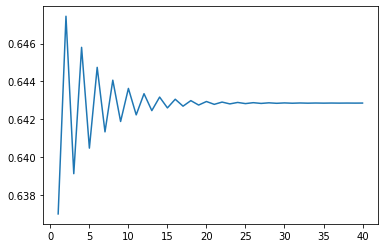

In [12]:
graficar(0.35,40,2.8)

In [13]:
print("f(x) tiende a "+ str(iterar(logistic_map,0.5,40,2.8)))

f(x) tiende a 0.6428477009488067


### b) 

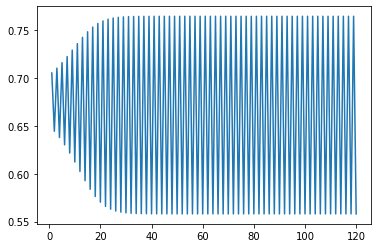

In [14]:
graficar(0.35,120,3.1)

In [15]:
iterarLista(logistic_map,0.35,20,3.1,lista=[])

[0.70525,
 0.6444045562499999,
 0.7103567048161459,
 0.637825175890568,
 0.7161130847612754,
 0.6302149172443939,
 0.7224366335138105,
 0.6216180266202327,
 0.7291480723631012,
 0.6122225988900524,
 0.7359588737249235,
 0.6024025707224433,
 0.7424925118792485,
 0.5927118832157269,
 0.7483539708028396,
 0.5837929460780331,
 0.7532341007814479,
 0.5762047196243756,
 0.756997806191608,
 0.5702515955993722]

En este caso la función oscila de manera uniforme entre alrededor de 0.6 y alrededor de 0.7

## Diagrama de CobWeb

<div class="alert alert-info">
    
**Ejercicio** Dibuja en una gráfica `logistic_map`, como ejes usa $N_{n+1}$ y $N_n$, además agrega la línea $y = x$ en la misma gráfica. ¿Qué observas para los distintos valores de $r$? Grafícala junto a la gráfica anterior.
</div>

In [16]:
def cobweb(x0,N,r):
    y = iterarLista(logistic_map,x0,N,r,lista=[])
    x = y[:-1]
    x.insert(0,x0)
    f=plt.subplot()
    f.scatter(x,y)
    f.plot([x[0],x[-1]],[x[0],x[-1]])
    plt.show()

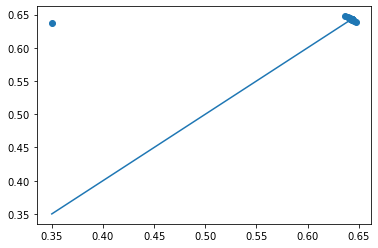

In [17]:
cobweb(0.35,50,2.8)

<font size="4">Para r=2.8, los valores de f(x) (con x0=0.35) tienden a agruparse sobre la recta y=x</font>

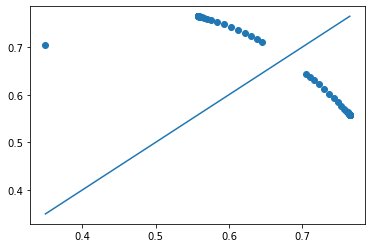

In [18]:
cobweb(0.35,50,3.1)

<font size="4">Para r=3.1, la gráfica no llega a intersectar a la recta y=x. Se forma una reflexión sobre esa recta. Los valores oscilan de manera más o menos uniforme.</font>

<div class="alert alert-info">
    
**Ejercicio** Agrega los segmentos de línea $(x_0, x_0), (x_0. f(x_0)), (f(x_0), f(x_0)), (f(x_0), f(f(x_0))), \ldots$
</div>

## Diagrama de Bifurcación

<div class="alert alert-info">
    
**Ejercicio** ¿Qué hace el siguiente código? Modificalo para que use nuestras funciones.
</div>

In [116]:
import math
from PIL import Image
imgx = 1000
imgy = 500
image = Image.new("RGB", (imgx, imgy))

xa = 1
xb = 4
maxit = 5000

for i in range(imgx):
    r = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    for j in range(maxit):
        x = r * x * (1 - x)
        if j > maxit / 2:
            image.putpixel((i, int(x * imgy)), (255, 255, 255))

image.save("bifurcacion.png", "PNG")

In [ ]:
import math
from PIL import Image
imgx = 1000
imgy = 500
image = Image.new("RGB", (imgx, imgy))

xa = 1
xb = 4
maxit = 5000

for i in range(imgx):
    r = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    vals = iterarLista(logistic_map,x,maxit,r,lista=[])
    for j in range(maxit/2,maxit):
        image.putpixel((i, int(vals[j] * imgy)), (255, 255, 255))
image.save("bifurcacion.png", "PNG")

Creo que tendría que ser algo parecido al código de arriba, pero se queda en espera cada que intento correrlo. No sé qué le pasa.

<img src="./bifurcacion.png"/>

### Pasos para producir el diagrama de bifurcación

1. Escoje un valor inicial para `r`
2. Escoje un valor al azar para `x` en `[0,1]`
3. Calcula la órbita de `x` bajo el `g` (en el caso anterior el mapeo logístico)
4. Ignora las primeras `n` iteraciones y dibuja el valor de `x` para la iteración `n+1`
5. Incrementa `r` y repite hasta `r` final.

<div class="alert alert-info">
**Ejercicio** Repite todo lo anterior para el mapeo

$$
f(x,\mu) = 1 - \mu x^2
$$

¿Qué diferencia observas? ¿Cuáles son sus puntos fijos? ¿Cuáles son los valores interesantes?
</div>

In [49]:
x = sympy.Symbol("x")
m = sympy.Symbol("m")
sympy.solve(1-x-m*x*x,x)

[(sqrt(4*m + 1) - 1)/(2*m), -(sqrt(4*m + 1) + 1)/(2*m)]

### Los puntos fijos, dado m, cumplen alguna de las ecuaciones de arriba

In [31]:
f1 = lambda x,m: 1-(m*(x**2))

In [20]:
def graficar1(x0,N,r):
    x = np.asarray([x+1 for x in range(N)])
    y = iterarLista(f,x0,N,r, lista=[])
    plt.plot(x,y)
    plt.show()

In [27]:
widgets.interact(graficar1,
        x0=widgets.FloatSlider(min=0,max=1,step=0.05),
        N=widgets.IntSlider(min=1,max=40),
        r=widgets.FloatSlider(min=0,max=2,step=0.1))

interactive(children=(FloatSlider(value=0.0, description='x0', max=1.0, step=0.05), IntSlider(value=1, descrip…

<function __main__.graficar1(x0, N, r)>

In [32]:
def cobweb1(x0,N,r):
    y = iterarLista(f1,x0,N,r,lista=[])
    x = y[:-1]
    x.insert(0,x0)
    f=plt.subplot()
    f.scatter(x,y)
    f.plot([x[0],x[-1]],[x[0],x[-1]])
    plt.show()

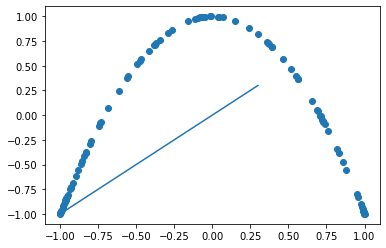

In [44]:
cobweb1(0.3,100,2)

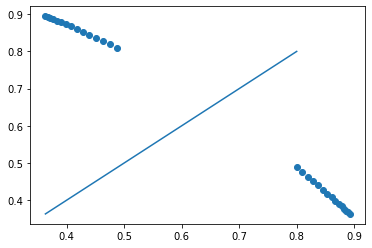

In [50]:
cobweb1(0.8,30,0.8)

Para este nuevo mapeo, si m es grande, f(x,m) tiende a infinito.